In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4])

In [3]:
a

array([1, 2, 3, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
a.dtype

dtype('int32')

In [6]:
a.ndim

1

In [7]:
a.shape

(4,)

In [8]:
f = np.array([5, 6, 7, 8])

In [9]:
f

array([5, 6, 7, 8])

In [10]:
a * f

array([ 5, 12, 21, 32])

In [11]:
a ** f

array([    1,    64,  2187, 65536], dtype=int32)

In [12]:
f / a

array([5.        , 3.        , 2.33333333, 2.        ])

# **Universal Functions (ufuncs)**

In [13]:
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [14]:
np.cos(a)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

In [16]:
np.tan(f)

array([-3.38051501, -0.29100619,  0.87144798, -6.79971146])

# **Two dimensional array**

In [17]:
b = np.array([[0, 1, 2, 3], [10, 11, 12, 13]])

In [18]:
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

In [19]:
b.shape

(2, 4)

In [20]:
b.size

8

In [22]:
b.ndim

2

In [27]:
# **Indexing**

In [26]:
b[1,3]

13

In [24]:
b[1]

array([10, 11, 12, 13])

In [25]:
b[0]

array([0, 1, 2, 3])

# **Slicing**

In [33]:
# Slicing arrays:
a = np.array([10, 11, 12, 13, 14])

In [29]:
a

array([10, 11, 12, 13, 14])

In [30]:
# indices:
a[1:3]

array([11, 12])

In [31]:
# negative indices work also:
a[1: -2]

array([11, 12])

In [32]:
a[-4: 3]

array([11, 12])

In [34]:
# Omitting Indices

In [35]:
# grab first three elements
a[:3]

array([10, 11, 12])

In [36]:
# grab last two elements
a[-2:]

array([13, 14])

In [37]:
# every other element
a[::2]

array([10, 12, 14])

# **Exercise**

In [39]:
a = np.arange(25).reshape(5, 5)

In [40]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [41]:
red = a[:, 1::2]

In [42]:
red

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [43]:
yellow = a[4, :]

In [44]:
yellow

array([20, 21, 22, 23, 24])

In [45]:
a[4]

array([20, 21, 22, 23, 24])

In [46]:
a[-1, :]

array([20, 21, 22, 23, 24])

In [47]:
blue = a[1::2, :3:2]

In [48]:
blue

array([[ 5,  7],
       [15, 17]])

In [49]:
blue = a[1::2, :4:2]

In [50]:
blue

array([[ 5,  7],
       [15, 17]])

In [51]:
blue = a[1::2, :-1:2]

In [52]:
blue

array([[ 5,  7],
       [15, 17]])

In [53]:
import matplotlib.pyplot as plt

In [54]:
img = plt.imread('./dc_metro.png')

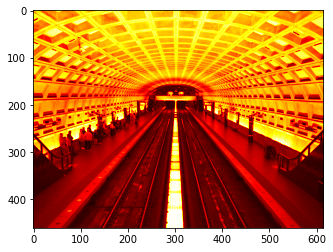

In [55]:
plt.imshow(img, cmap=plt.cm.hot)

In [56]:
"""
Filter Image
------------

Read in the "dc_metro" image and use an averaging filter
to "smooth" the image.  Use a "5 point stencil" where
you average the current pixel with its neighboring pixels::

              0 0 0 0 0 0 0
              0 0 0 x 0 0 0
              0 0 x x x 0 0
              0 0 0 x 0 0 0
              0 0 0 0 0 0 0

Plot the image, the smoothed image, and the difference between the
two.

Bonus
~~~~~

Re-filter the image by passing the result image through the filter again. Do
this 50 times and plot the resulting image.

"""

'\nFilter Image\n------------\n\nRead in the "dc_metro" image and use an averaging filter\nto "smooth" the image.  Use a "5 point stencil" where\nyou average the current pixel with its neighboring pixels::\n\n              0 0 0 0 0 0 0\n              0 0 0 x 0 0 0\n              0 0 x x x 0 0\n              0 0 0 x 0 0 0\n              0 0 0 0 0 0 0\n\nPlot the image, the smoothed image, and the difference between the\ntwo.\n\nBonus\n~~~~~\n\nRe-filter the image by passing the result image through the filter again. Do\nthis 50 times and plot the resulting image.\n\n'

In [57]:
def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


In [58]:
def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed

In [59]:
img = plt.imread('dc_metro.png')
avg_img = smooth(img)

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
# Set colormap so that images are plotted in gray scale.
plt.gray()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'original')

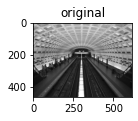

In [61]:
# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

Text(0.5, 1.0, 'smoothed once')

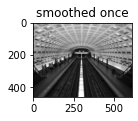

In [62]:
# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

Text(0.5, 1.0, 'difference')

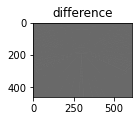

In [63]:
# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')

In [64]:
# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)


Text(0.5, 1.0, 'original')

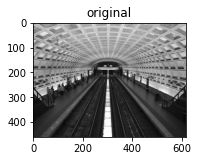

In [65]:
# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

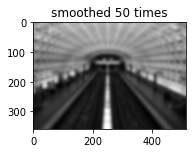

In [66]:
# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()

# **Fancy Indexing**

In [67]:
# Indexing by Position
a = np.arange(0, 80, 10)

In [68]:
a

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [71]:
indices = [1, 2, -3]
y = a[indices]
print(y)

[10 20 50]


In [72]:
# this also works with setting
a[indices] = 99
a

array([ 0, 99, 99, 30, 40, 99, 60, 70])

In [73]:
# Indexing with Booleans
# Manual creation of masks
mask = np.array([0, 1, 1, 0, 0, 1, 0, 0], dtype=bool)

In [74]:
# fancy indexing
y = a[mask]
print(y)

[99 99 99]


In [75]:
a = np.array([-1, -3, 1, 4, -6, 9, 3])

In [77]:
negative = a < 0

In [79]:
a[negative]

array([-1, -3, -6])

In [80]:
a[negative] = 0

In [81]:
a

array([0, 0, 1, 4, 0, 9, 3])

In [1]:
import matplotlib.pyplot as plt